In [1]:
import numpy as np
import scipy as sp
import scipy.special
import matplotlib.pyplot as plt
import mpmath as mp
from mpmath import hyp1f1
import KGInt as kg

%matplotlib inline

In [2]:
makefloat = np.frompyfunc(float,1,1)
F         = np.frompyfunc(hyp1f1, 3,1)
goreal    = np.frompyfunc(lambda a: a.real, 1,1)
goimag    = np.frompyfunc(lambda a: a.imag, 1,1)

In [20]:
#plot hypergeometric
#hypgeom from mathmp package
def plotF(kr, eta):
    y = np.linspace(-0.95,1, 1000)
    A=F(1+1j*eta, 1, 1j*kr*(1+y))
    v=makefloat(goreal(A))
    plt.plot(y,v)

## Plot hypgeom with kr=30, eta=0.2 (used mathmp package)

### y range from -0.95 to 1 (y<-0.95 F start to grow)

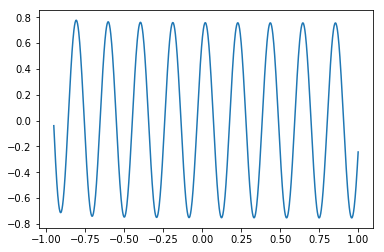

In [21]:
plotF(30,0.2)

#### same plot, but hypgeom from asymtotic, implemented in c++

\begin{equation}
G(a,b,z) = \sum_i \frac{(a)_i(b)_i}{z^n n!}
\end{equation}

term = $\frac{(a+i)(b+i)}{z*(i+1)}$ i from 0
### in G  sum abs(term)>1e-2

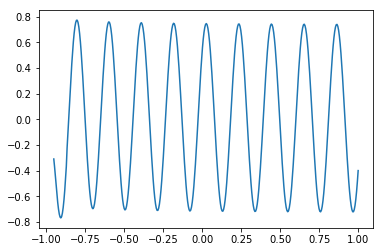

In [34]:
N=400
y=np.linspace(-1,1,N)
FFF = kg.hyp1f1_asym(N, 30, 0.2, 1e-2)
plt.plot(y,FFF.real)

### in G  sum abs(term)>1e-6 (was used in making the current Coulomb table) 
### nan changed to zero

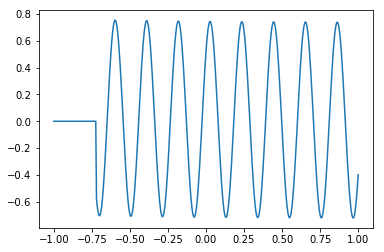

In [39]:
N=400
y=np.linspace(-1,1,N)
FFF = kg.hyp1f1_asym(N, 30, 0.2, 1e-6)
plt.plot(y,np.nan_to_num(FFF.real))

#### series sum

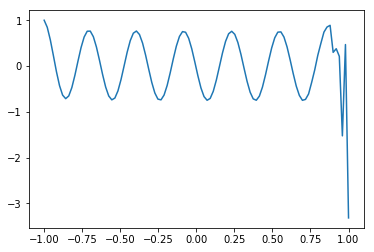

In [26]:
N=100
y=np.linspace(-1,1,N)
FFF = kg.hyp1f1(N, 20, 0.2, 1e-7)
plt.plot(y,FFF.real)

# -----------------------------------------------------------------------------------------------------

In [9]:
30**90/mp.factorial(90)

mpf('5.8745842252103338e-6')

In [10]:
950**2600/mp.factorial(2600)

mpf('1.6208075366903504e-10')

In [ ]:
#full integrand hypergeometric combination
def plot(kr, eta):
    y = np.linspace(-1,1, 1000)
    A=F(1+1j*eta, 1, -1j*kr*(1-y))*(F(1-1j*eta, 1, 1j*kr*(1-y))+F(1-1j*eta, 1, 1j*kr*(1+y)))
    v=makefloat(goreal(A))
    plt.plot(y,v)

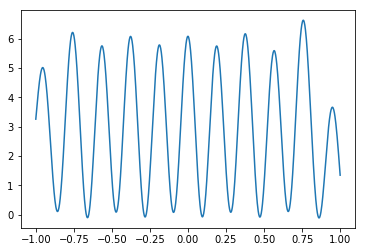

In [13]:
plot(17,0.3)

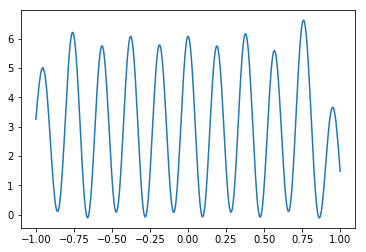

In [12]:
N=1000
y=np.linspace(-1,1,N)
FFF = kg.hyp1f1_FFF(N, 17, 0.3, 1e-6)
plt.plot(y,FFF.real)

\begin{equation}
\eta = \frac{\mu\alpha}{2k}=\frac{m_\pi\alpha}{4k}
\end{equation}

$k=xm_\pi$
\begin{equation}
\eta = \frac{\mu\alpha}{2k}=\frac{m_\pi\alpha}{4k}=\frac{\alpha}{4x}
\end{equation}

In [4]:
%%com
eta=0.25
x = alpha

eta = 1e-5

x = alpha*1e+5/4

alpha=1
x=np.linspace(1e-4, 0.25, 1000)
eta = alpha/(4*x)
plt.yscale("log")
plt.plot(x,eta)

ERROR:root:Cell magic `%%com` not found.
